# 一、 分类、回归（监督学习）

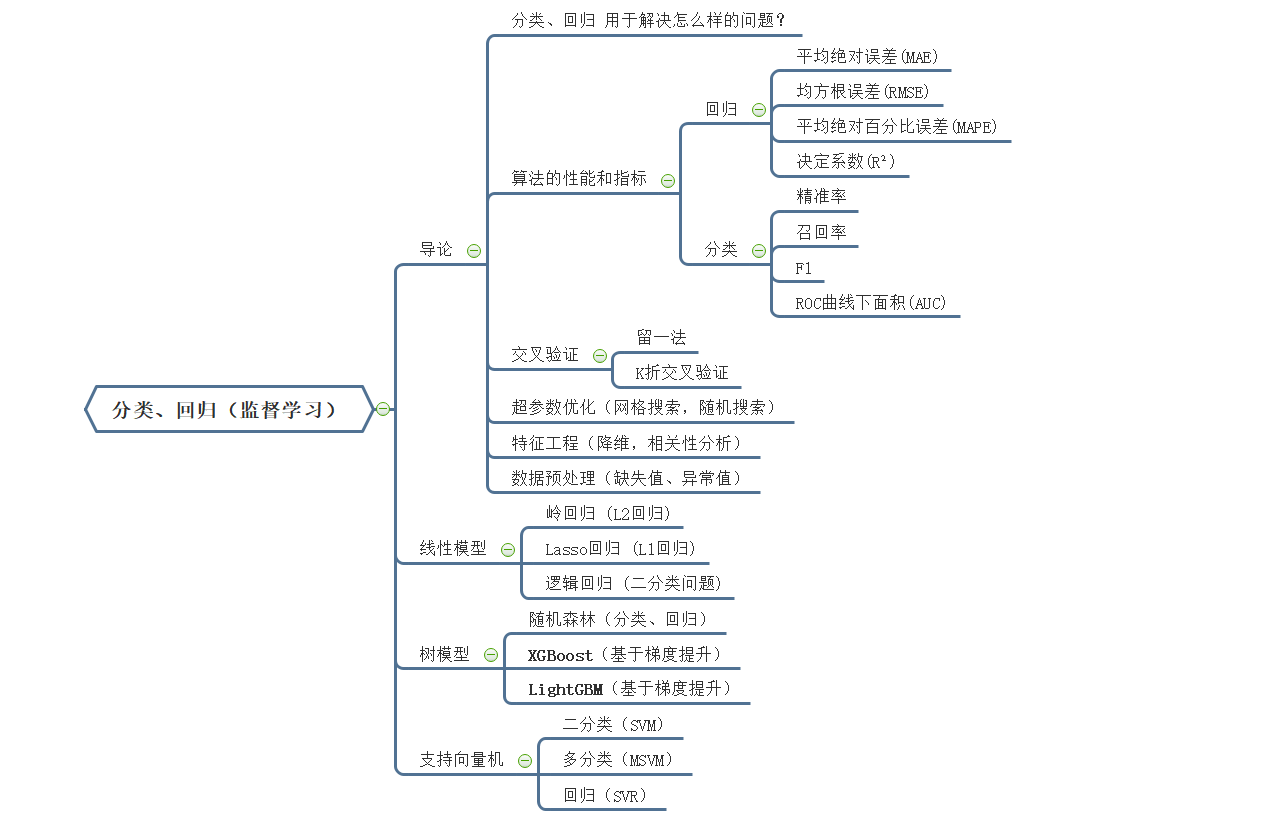

## 1.1 导论

### 1.1.1 分类、回归 用于解决怎么样的问题？

在机器学习中，分类和回归是两种有标签的监督学习任务，用于解决不同类型的问题，具体如下：

(i) **分类** (Classification):

   分类是指将输入数据划分到预定义的**类别或标签**中。分类模型的目标是学习一个决策边界,根据输入特征将数据点映射到相应的类别。
   分类问题的特点:
   - 输出是离散的类别或标签。
   - 每个数据点只能属于一个类别。
   - 类别之间通常没有顺序或大小关系。
   - 常见的分类问题例子:
      - 垃圾邮件识别:将邮件分为"垃圾邮件"和"非垃圾邮件"两个类别。
      - 手写数字识别:将手写的数字图像分为0到9的十个类别。
      - 疾病诊断:根据患者的症状和检测结果, 将其分为"患病"和"未患病"两个类别。

(ii) **回归** (Regression):

   回归是指预测**连续值**输出变量与输入变量之间的关系。回归模型的目标是学习一个函数,根据输入特征估计输出变量的值。
   回归问题的特点:
   - 输出是连续的数值。
   - 输入和输出之间存在某种函数关系。
   - 预测结果通常是一个实数值。
   - 常见的回归问题例子:
      - 房价预测:根据房屋的面积、位置、房龄等特征,预测房屋的价格。
      - 销量预测:根据历史销售数据、促销活动、季节等因素,预测未来一段时间内的产品销量。
      - 温度预测:根据历史气象数据、地理位置、时间等因素,预测未来某一时刻的温度值。

总结:
- 分类用于将数据划分到预定义的类别或标签中,输出是离散的。常见的分类问题包括垃圾邮件识别、手写数字识别和疾病诊断等。
- 回归用于预测连续值输出变量与输入变量之间的关系,输出是连续的数值。常见的回归问题包括房价预测、销量预测和温度预测等。
- 选择使用分类还是回归取决于问题的性质和需要预测的目标变量类型。<u>_如果目标变量是离散的类别或标签,则使用分类;如果目标变量是连续的数值,则使用回归_</u>。


### 1.1.2 算法的性能指标（回归、分类、泛化 和 过/欠拟合）

#### 1.1.2.1 标签和特征集的表示

已知一组样本的特征维度为$m$，样本个数为$n$，无论是分类还是回归的任务，我们统一把要预测的值称为“**标签**(label)”。故该样本的标签可以用一个$n$维行向量$\boldsymbol{y}=\{y_1,y_2,\dots,y_n\}$表示，而其特征可以用$m$维特征向量的集合$\boldsymbol{X}=\{ \boldsymbol{x}_1,\boldsymbol{x}_2,\dots,\boldsymbol{x}_n \}$表示，其中的每个$\boldsymbol{x}_i\quad (i=1,2,\dots,n)$都是一个长度为$m$的列向量，比如以$m=4,n=3$为例，列表有：

- 标签向量:
  $\boldsymbol{y} = \{y_1,y_2,y_3 \}$
- 特征向量集合:
  $X = \{ \boldsymbol{x}_1, \boldsymbol{x}_2, \boldsymbol{x}_3 \}$,其中:
  - $\boldsymbol{x}_1 = \begin{bmatrix} x_{11} \\ x_{12} \\ x_{13} \\ x_{14} \end{bmatrix}$
  - $\boldsymbol{x}_2 = \begin{bmatrix} x_{21} \\ x_{22} \\ x_{23} \\ x_{24} \end{bmatrix}$
  - $\boldsymbol{x}_3 = \begin{bmatrix} x_{31} \\ x_{32} \\ x_{33} \\ x_{34} \end{bmatrix}$
在这个例子中,我们有:
1. 样本个数 $n = 3$
2. 特征维度 $m = 4$
3. 标签向量 $\boldsymbol{y}$ 是一个 $1 \times 3$ 的行向量
4. 特征向量集合 $X$ 包含三个 $4 \times 1$ 的列向量 $\boldsymbol{x}_1$, $\boldsymbol{x}_2$, $\boldsymbol{x}_3$

#### 1.1.2.2 性能指标

现在已知有一组个数为$n$，特征为$m$的样本，其特征集和真实值标签分别为$\boldsymbol{X}=\{ \boldsymbol{x}_1,\boldsymbol{x}_2,\dots,\boldsymbol{x}_n \}$和$\boldsymbol{y}=\{y_1,y_2,\dots,y_n\}$ 我们对于某个特定的机器学习模型的分类、回归方法，得到了预测值标签$\hat{\boldsymbol{y}}$，现在需要知道这个方法的合理性，我们可以采取一些指标来评价这个模型在这个样本的性能如何，而由于分类和回归两个问题的标签不同，因此我们分类讨论两种的常用性能指标及其，分别如下所示：

##### 1.1.2.2.1 回归的性能指标

- **平均绝对误差 (MAE)**: 表示预测值与真实值的绝对值之差的平均数，数学表示为
    $$MAE = \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y}_i|$$
    MAE 表示预测值与真实值之间的平均绝对差异。MAE 越小,表示模型的预测误差越小。

- **均方误差 (MSE)**: 表示预测值与真实值之差的平方的平均数，数学表示为
    $$MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$$

    MSE 表示预测值与真实值之间的平均平方差。MSE 越小,表示模型的预测误差越小。


    *注意：在误差大于1的情况下，MSE与MAE的区别是MSE对较大的误差比较敏感，因此相同情况下对于误差大的数据MSE的值会较大一些，因此适用于在误差较敏感的情景中*


- **均方根误差 (RMSE)**: 均方误差(MSE)的根号，与原标签有相同的量纲，数学表示为
    $$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2}$$

    RMSE 是 MSE 的平方根,表示预测值与真实值之间的平均误差大小。RMSE 越小,表示模型的预测误差越小。

- **决定系数 ($R^2$)**: 用于衡量模型的拟合优度，描述了因变量的变异中可以被自变量解释的比例，数学表示为
    $$R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$$
    其中,$\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$表示真实值的平均值。$R^2$表示模型的拟合优度,取值范围为 $(-\infty, 1]$。$R^2$越接近 1,表示模型的拟合效果越好。

*这些指标可以帮助我们评估回归模型的性能。通常,我们希望模型的 $MAE$、$MSE$ 和 $RMSE$ 尽可能小,而 $R^2$ 尽可能接近 1* 

##### 1.1.2.2.2 分类的性能指标(二分类)

先看下面这个笑话：

```
小明同学说：“分类指标为什么要这么多复杂的东西啊？我觉得很简单啊，就定义：准确率 = 分类成功的样本数量 / 总测试样本数量，这样不就行了？我觉得很合理啊！”

小强：“好的，现在已知全国新冠患者数量为总人口的3%，我现在是个学习器，我觉得我们班全部人都没得新冠（事实上确实如此），你看，我的准确率是100%，但是这有啥意义呢？”

小明：“你说得对...”
```

由此可见，分类的指标并不像回归一样简单，而是需要综合各方面因素来考虑。

【**接下来的内容阅读前请先了解 混淆矩阵 的概念**】

 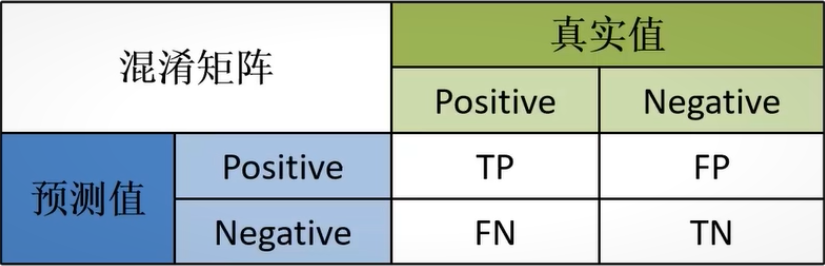

 其中：
- $TP$ 表示真正例（True Positives），指本身是正类且被模型正确预测为正类的样本数量。
- $TN$ 表示真负例（True Negatives），指本身是负类且被模型正确预测为负类的样本数量。
- $FP$ 表示假正例（False Positives），指模型错误地将负类样本预测为正类的数量。
- $FN$ 表示假负例（False Negatives），指模型错误地将正类样本预测为负类的数量。

总之，在评估分类模型的性能时，通常使用以下指标（**下面例子均以二分类为例，即分类标签只有两种的情况，后面会说多分类如何进行**）：

- **准确率**：准确率是指模型预测正确的样本（正例和负例）占所有样本的比例。数学表示为：
    $$
    \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
    $$
    其中：
    - $TP$ 表示真正例（True Positives），指本身是正类且被模型正确预测为正类的样本数量。
    - $TN$ 表示真负例（True Negatives），指本身是负类且被模型正确预测为负类的样本数量。
    - $FP$ 表示假正例（False Positives），指模型错误地将负类样本预测为正类的数量。
    - $FN$ 表示假负例（False Negatives），指模型错误地将正类样本预测为负类的数量。

- **精准率（Precision）**：精准率是指模型预测为正例的样本中，真正为正例的比例。数学表示为：
    $$
    \text{Precision} = \frac{TP}{TP + FP}
    $$
    其中
    - $TP$ 表示真正例（True Positives），指本身是正类且被模型正确预测为正类的样本数量。
    - $FP$ 表示假正例（False Positives），指模型错误地将负类样本预测为正类的数量。


- **召回率（Recall）**：召回率是指真实为正例的样本中，被模型预测为正例的比例。数学表示为：
    $$
    \text{Recall} = \frac{TP}{TP + FN}
    $$
    其中
    - $TP$ 表示真正例（True Positives），指本身是正类且被模型正确预测为正类的样本数量。
    - $FN$ 表示假负例（False Negatives），指模型错误地将正类样本预测为负类的数量。


- **F1系数（F1）**：F1-Score是精准率和召回率的调和平均数，综合考虑了模型的精度和召回率。数学表示为：
    $$
    \text{F1-Score} = \frac{2 \ \text{Precision} \ ·\  \text{Recall}}{\text{Precision} \ + \ \text{Recall}}
    $$
    <u>其中F1 系数是一个常用的综合指标，由于其综合考虑了模型的 **精准率** 和 **召回率**，故常用于评估机器学习分类模型的综合性能。</u>

- **AUC**：【仅适用于**二分类**，且要求一定要有**分类标签得分**的算法才能计算出来  ★★★☆☆】具体表示的是**ROC曲线和横轴包围的面积**，其中 ROC曲线的横轴是**FPR**，纵轴是**TPR**，

    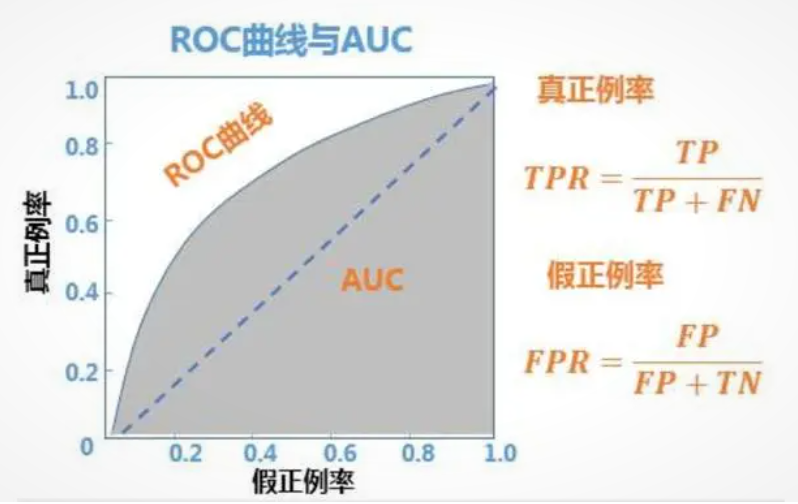

    其具体数学表达为：

    - **假正例率 (FPR)** 的公式：
        $$
        FPR = \frac{FP}{N_-}
        $$
        其中：
        * $FP$ 是假正例的数量（模型错误预测为正例的负例）
        * $N_-$ 是真实负例的总数，根据混淆矩阵显然有$N_-=FP+TN$

    - **真正例率 (TPR)** 的公式：
        $$
        TPR = \frac{TP}{N_+}
        $$
        其中：
        * $TP$ 是真正例的数量（模型正确预测为正例的正例）
        * $N_+$ 是真实正例的总数，根据混淆矩阵显然有$N_+=TP+FN$
    
    之所以能造成多个样本点形成曲线，其原因是ROC曲线是通过改变**分类得分**的阈值得到的，举一个例子如下:
    
    “*已知某学习器的分类得分$s$范围是$[0,1]$，其中值越接近$0$，则越接近类1，反之越接近1，则越接近类2（二分类）*”
    
    因此我们只要设置不同的**分类得分阈值**，再比较测试样本的**分类得分**进行分类阈值，例如一组大小为5的样本的**分类得分**为$\{0.1,0.2,0.5,0.7,0.9\}$，我们可以改变阈值，从而形成不同的分类情况，例如：

    - 我们认为$＞0.5$的得分为类2，反之为类1，则分类情况为$\{类1,类1,类1,类2,类2\}$；
    - 若认为$＞0.7$的才是类2，则分类情况为$\{类1,类1,类1,类1,类2\}$
    
    因此改变阈值，就可以得出多组**FPR、TPR**，从而即可画出ROC曲线，来计算AUC（ROC曲线下面积）作为二分类的指标，其中
    
    - AUC的取值范围是$[0,1]$
    - 越接近0.5，代表这个分类器近似于随机分类，即其性能接近于随机二选一决定，性能非常差
    - AUC等于1，代表这个分类器至少存在一个**分类得分阈值**，可以完美地全部正确地进行二分类（因此这是我们所希望的**AUC取值**，即**越大越好**）
    - AUC等于0，代表这个分类器可以完美错误地把正例预测为负例，把负例预测为正例（一般不会出现AUC在0~0.5的分类器）



##### 1.1.2.2.3 分类的性能指标(多分类)

在前面二分类的例子中，**除了AUC**（只适用于二分类），其他的指标（准确率，精准率，召回率，F1）的计算，只需要模型提供**预测值标签**和**真实值标签**即可，因此这些指标也可拓展从而作为多分类的模型性能评价指标，我们以标签为$\{好,良好,中等,较差,非常差\}$的完备标签集合（五类）为例子，解释如何建立多分类的性能指标（以精准率$Accuracy$为例）：

**精准率 (Accuracy)**
* 定义：准确率衡量模型正确预测所有类别的样本的比例。
* 公式：

$$精准率 = 正确预测的样本数 / 总样本数$$

**多分类精准率的计算：**
对于多分类任务，准确率的计算方法如下：
1. **对于每个类别，计算该类别的精准率：**

    $$类别 i 的精准率 = 正确预测为类别 i 的样本数 / 预测为类别 i 的样本总数$$

2. **计算所有类别的平均精准率：**

    $$多分类准确率 = (类别 1 的精准率 + 类别 2 的精准率 + ... + 类别 n 的精准率) / 类别总数$$

    *也就是即$n$个类别的精准率平均值*

因此可知，我们可以把每个类别和其他类分离，就可以转化为二分类问题，例如 中等 为一类，$\{好,良好,较差,非常差\}$为另一类，则可以根据二分类的情况算出精准率$Accuracy_{中等}$，其他四个类也一样，从而得出了：$Accuracy_{好}$、$Accuracy_{良好}$、$Accuracy_{中等}$、$Accuracy_{较差}$、$Accuracy_{非常差}$ 一共五个类的精准度，最后求平均值即可作为最终的精准率$Accuracy$指标，其他指标（准确率，召回率，F1）的计算方式相同，不再赘述。


##### 1.1.2.2.4 欠拟合，过拟合 和 泛化

"*机器学习模型就像一面镜子，它反映了训练数据的质量。如果训练数据中有噪声或偏差，那么模型也会学习这些缺陷。欠拟合和过拟合是两个极端，它们都表明模型无法从数据中学到正确的模式。*"

- **欠拟合**
    * **定义：**欠拟合是指模型在训练集上表现不佳，无法捕捉数据中的模式和趋势。
    * **比喻：**"就像一个学生在考试中表现得很差，因为他没有充分地复习考试的资料。"
    * **举例：**线性回归模型在拟合非线性数据时可能出现欠拟合，导致预测不准确。

- **过拟合**
    * **定义：**过拟合是指模型在训练集上表现很好，但无法泛化到新数据。其原因可能是模型捕捉了训练数据中的噪声和异常值，而不是学习数据的底层模式（从过拟合可以反思，训练集样本如果不能很好地采样自整体的分布，则模型也不能很好地学习到整体模式，且噪声和异常值会被模型学习，因此数据处理[1.1.6]很重要）
    * **比喻：**"就像一个学生在考试中得了高分，但只是因为他只是恰好死记硬背了考试所考的题目，而考试不考的且和知识点类似的题却没有完美掌握"
    * **举例：**决策树模型在训练集上可能出现过拟合，导致对新数据的预测过于具体和不准确。

- **泛化**
    * **定义：**泛化是指模型能够在训练集之外的新数据上表现良好。它表明模型已经学习了数据的底层模式，而不是仅仅记住训练数据。
    * **比喻：**"就像一个学生在同样知识点的考试中**多次**表现良好，因为他们理解了所学内容，并且能够将其应用到新的问题上。"
    * **举例：**支持向量机模型通常具有良好的泛化能力，因为它专注于学习数据的最大间隔，而不是记住个别数据点。

### 1.1.3 交叉验证

#### 1.1.3.1 定义和步骤

交叉验证是一种用于评估机器学习模型性能的重要技术，它通过多次训练和评估模型来减少过拟合并提高泛化能力，可以获得模型性能的更可靠估计，并减少过拟合的风险。



交叉验证将数据集$D$划分为多个(以$k$个为例)不相交的子集$\{D_1,D_2,\dots,D_k\}$,满足

$$

D=D_1\cup D_2 \cup\dots\cup D_k

$$

$$

\forall i,j=1,2,\ldots,k\quad D_i\cap D_j=\phi

$$

（这些子集称为折,且一般每个折都具有大概相同的大小），然后使用以下步骤进行：

- (i) 训练：使用除一个折之外的所有折来训练模型。
- (ii) 验证：使用剩余的折来评估训练好的模型。
- (iii) 重复：重复步骤 (i) 和 (ii)，直到所有折都被用作验证集。

#### 1.1.3.3 优点与分类

其优点包括：

- 减少过拟合：通过使用不同的训练和验证集组合，交叉验证可以帮助防止模型过拟合于特定训练集。
- 提高泛化能力：通过在多个数据集上评估模型，交叉验证可以提供模型泛化能力的更可靠估计。
- 选择最佳模型：交叉验证可以用来比较不同模型或超参数设置，并选择在所有折上表现最好的模型。


有几种不同的交叉验证类型，最常见的有：

- $k$ 折交叉验证：数据集被随机划分为 $k$ 个相等的折。
- 留一法交叉验证：数据集被划分为 $n$ 个折，其中 $n$ 是数据集中的样本数。
- 分层交叉验证：当数据集具有类别不平衡时使用，它确保每个折中类别的分布与整个数据集中相似(**例如多分类任务中，划分的时候尽量让训练集和测试集的不同类样本比例相同**)

#### 1.1.3.5 应用举例

假设我们有一个包含 100 个样本的数据集，我们想使用 5 折交叉验证来评估一个机器学习模型：

- (i) 将数据集随机划分为 5 个大小相等的折（每个折包含 20 个样本）。
- (ii) 使用除折 1 之外的所有折（80 个样本）训练模型。
- (iii) 使用折 1（20 个样本）评估训练好的模型，并记录其性能指标（例如准确率）。
- (iv) 重复步骤 (ii) 和 (iii)，使用不同的折作为验证集。
- (v) <u>将所有 5 次验证的性能指标取平均值，作为模型在该数据集上的最终性能估计。</u>★★★★☆（精华）

### 1.1.4 超参数优化（网格搜索，随机搜索）

#### 1.1.4.1 概念和定义

机器学习模型的性能不仅取决于训练数据和模型结构，还取决于超参数。超参数是指模型训练时需要手动设定的值，而不能通过训练数据学习。

*超参数优化是找到最佳超参数集的过程，以最大化模型的性能*

从不同的超参数的模型中算出其模型评价指标$f$，则超参数优化问题可以变成求函数

$$f(\alpha_1,\alpha_2,\dots,\alpha_t)$$

的最值问题，其中
- $\alpha_1\sim \alpha_t$ 为模型的$t$个超参数
- $f$ 为模型在这个数据集的评价指标，例如均方误差，精准率等

从而可见通过改变这$t$个超参数，从而让函数$f$的值往模型性能最好的方向优化。

因此我们的目的是找到最佳的超参数集，从而提高机器学习模型的性能，这里仅介绍两种常用的超参数优化方法：**网格搜索**和**随机搜索**，实际上还有其他启发式的优化算法（例如贝叶斯优化，神经网络常用的Adam优化器等等）

#### 1.1.4.2 网格搜索和随机搜索

**参数空间**是指机器学习模型中所有可能超参数值的集合；例如一个模型有两个超参数$a,b$，且取值分别为$[0,1]$和{0,1,2} 则由这两个定义域构成的集合即为参数空间（抽象理解为函数$f$的定义域即可）

- (i) **网格搜索（适用于超参数是离散的搜索空间）**

    网格搜索是一种穷举搜索方法，适用于小的参数空间，它遍历超参数值的一个预定义网格。对于每个超参数组合，网格搜索训练一个模型并评估其性能

    **优点：**
    - 全面：网格搜索考虑了所有可能的超参数组合。
    - 易于实现：网格搜索相对容易实现。

    **缺点：**
    - 计算成本高：当超参数空间较大时，网格搜索可能需要训练大量的模型，这可能会非常耗时。

- (ii) **随机搜索（适用于超参数是连续型的搜索空间）**

    随机搜索是一种基于采样的方法，它从超参数空间中随机抽取超参数组合。对于每个组合，随机搜索训练一个模型并评估其性能。

    **优点：**
    - 计算成本低：随机搜索比网格搜索训练的模型更少，因此计算成本更低。
    - 探索性强：随机搜索可以探索超参数空间中网格搜索可能错过的区域，从而增加找到全局最优超参数集的机会。

    **缺点：**
    - 不全面：随机搜索可能无法考虑所有可能的超参数组合。
    - 随机性：随机搜索的结果可能因不同的随机种子而异。

#### 1.1.4.2 应用举例

假设我们有一个机器学习模型，有两个超参数：学习率和正则化参数。我们可以使用网格搜索和随机搜索来优化这些超参数：

**(i) 网格搜索：**
* 定义超参数网格：
    * 学习率：${0.01, 0.05, 0.1}$
    * 正则化参数：${0.01, 0.1, 1.0}$
* 训练和评估所有 $3\times 3=9$ 个超参数组合，计算出评估函数$f$。
* 选择具有最佳$f$值对应的超参数组合。

**(ii) 随机搜索：**
* 定义超参数搜索空间：
    * 学习率：均匀分布在 $[0.01, 0.1]$ 之间
    * 正则化参数：均匀分布在 $[0.01, 1.0]$ 之间
* 随机在定义域抽取 50 个超参数组合，计算出评估函数$f$。
* 选择具有最佳$f$值对应的超参数组合。

### 1.1.5 特征工程（降维，相关性分析）
#### 1.1.5.1 为什么要选取特征？
特征选取对于机器学习至关重要，因为它提供了以下好处：
* **提高模型性能**：去除不相关或冗余的特征可以提高模型的准确性和泛化能力。
* **提高模型的可解释性**：通过选择与目标变量最相关的特征，我们可以更好地理解模型的决策过程。

#### 1.1.5.2 特征工程的两种方法

特征选取一般用相关性分析即可，因为降维是会把多个维度的特征融合到一起，也就说**降维并非只是单单减少了特征，而是把多个特征融合成了新的特征**，因此解释性差；总之，特征工程有以下两种应用，分别服务于不同的用途：

##### 1.1.5.2.1 降维（用于可视化）
降维技术（如 PCA 和 LDA）可以减少特征的数量，同时保留或提高模型的性能。这对于可视化高维数据非常有用，因为我们可以将数据投影到较低维度的空间（2维和3维）中进行可视化。（例如把10维数据投影到3维，以检验聚类的分类结果等）

##### 1.1.5.2.2 相关性分析（用于排除冗余特征）
相关性分析可以识别特征之间的相关性。这对于消除冗余特征和选择与目标变量最相关的特征非常有用。皮尔逊(Pearson)和斯皮尔秩(Spearman)相关系数是最常用的相关性度量，它衡量两个特征之间的线性相关性。例如现在已知特征集$\boldsymbol{X}=\{ \boldsymbol{x}_1,\boldsymbol{x}_2,\dots,\boldsymbol{x}_m \}$和真实值标签$\boldsymbol{y}$，且有先验知识认为这$m$个特征**并非**都和标签$\boldsymbol{y}$相关，此时就可以用相关性分析，依次计算出$\boldsymbol{y}$和这$m$个特征$\boldsymbol{x}_i, (i=1,2,\dots,m)$的相关系数，然后就可以排除相关性较小的几个特征，提高模型的准确性。（具体的相关性分析流程在第三章会细说）


### 1.1.6 数据预处理（缺失值，异常值）

#### 1.1.6.1 分类变量编码

##### 1.1.6.1.1 编码方式分类

分类变量是具有有限且离散值的变量，例如性别、职业或产品类别。在机器学习中，这些变量通常需要转换为数值形式才能用于模型训练。这个过程称为分类变量编码。有几种不同的分类变量编码方法，最常见的编码方法包括：

1. **标签编码 (Label Encoding)** （最常用）
    标签编码将每个类别分配一个唯一的整数。例如：
    * **二分类变量：**
        * 性别：
            * 男性：1
            * 女性：2
    * **多分类变量：**
        * 产品类别：
            * 电子产品：1
            * 服装：2
            * 家具：3
    标签编码的优点是它不会增加特征的数量。它的缺点是它可以引入顺序偏差，因为分配给类别的整数可能被解释为重要性或优先级的度量。

2. **独热编码 (One-Hot Encoding)**
    独热编码将每个类别转换为一个新的二进制特征。例如：
    * **二分类变量：**
        * 性别：
            * 男性：10
            * 女性：01
    * **多分类变量：**
        * 产品类别：
            * 电子产品：100
            * 服装：010
            * 家具：001

3. **二进制编码 (Binary Encoding)**
    二进制编码将每个类别转换为一个二进制位序列。例如：
    * **二分类变量：**
        * 性别：
            * 男性：0
            * 女性：1
    * **多分类变量：**
        * 产品类别：
            * 电子产品：00
            * 服装：01
            * 家具：10
    二进制编码的优点是它不会增加特征的数量，并且可以捕获类别之间的层次关系。它的缺点是它可能难以理解和使用。


##### 1.1.6.1.2 编码方式选择

在选择分类变量编码方式时，应考虑以下因素：

1. **模型的类型**：一些机器学习算法对数据的表示形式非常敏感。例如，<u>基于树的模型（如决策树、随机森林和梯度提升树）可以很好地处理整数编码（如标签编码）</u>，因为它们不依赖于数据的距离度量。而像线性回归、逻辑回归这样的模型，则更适合使用独热编码，因为这种编码方式避免了引入任何关于类别间顺序或距离的假设。

2. **特征维度**：独热编码会显著增加数据集的特征数量，特别是当你有高基数（即，变量具有大量唯一值）的分类变量时。这可能导致维度灾难，影响模型的训练效率和效果。在这种情况下，考虑使用更为高效的编码方式，如二进制编码或者其他技术来减少维度。

3. **类别间的关系**：如果分类变量的类别之间存在自然的顺序（例如，教育水平：小学、初中、高中、大学），则可能需要一个能够反映这种顺序关系的编码方式。虽然标签编码天然地能够表达这种顺序，但在一些情况下，可能需要设计更加精细的编码策略来更好地捕捉这种顺序性。

4. **数据的稀疏性**：使用独热编码会产生很多的零值，这导致数据变得非常稀疏。在大规模数据集上，这可能对存储和计算效率产生负面影响。对于处理大规模稀疏数据集更为有效的模型和算法，这种编码方式可能是可行的；否则，可能需要考虑其他编码方式。

5. **模型的解释性**：独热编码提供了非常直观的特征表示，使得模型的解释和分析变得更加容易。如果模型的解释性是一个重要考虑因素，那么独热编码可能是一个好选择。


#### 1.1.6.2 缺失值处理

在进行机器学习分类或回归任务时，对特征的缺失值处理是必要的，毕竟不是所有算法都像XGBoost等算法可以自动处理缺失值，因此处理缺失值是数据预处理的一个重要环节。值得注意的是，选择合适的缺失值处理方法取决于多种因素，包括缺失数据的类型（随机缺失、非随机缺失等）、缺失值的比例、数据集的大小、以及具体的应用场景，而不同的处理方法可能会对模型的训练结果和性能产生显著影响。对此，以下是一些常用的缺失值处理方法：

##### 1.1.6.2.1 直接删除

- 处理方式：直接删除缺失值所在的样本。
- 适用情景：**缺失值所在的样本的总特征缺失值较多**，且所有这样的缺失值样本占数据集的比例较小。
  - 举例：$[NULL,NULL,NULL,1]$，该样本有四个特征，但是仅有一个特征有值，因此可以直接删除该样本。
- 优点：简单、快速。
- 缺点：缺失值样本多时，可能会丢失大量的信息。

##### 1.1.6.2.2 填充法

1. 平均值/中位数/众数填充
    - 处理方式：使用特征的平均值、中位数或众数填充缺失值
      - 连续型数据：方差小时使用平均值填充，方差大时使用中位数填充
      - 离散型数据：使用众数填充
    - 适用情景：非时间序列；**缺失值所在的样本的总特征缺失值少**，且缺失值的比例较小。
      - 举例：$[NULL,1.5,2,1]$，该样本有四个特征，但是仅有一个特征是缺失值，因此可以用缺失值所在特征的总平均值来填充。
    - 优点：广泛，简单
    - 缺点：可能会引入偏差，尤其是当缺失值的比例较大时。

2. 前向填充/后向填充/插值法填充
   - 处理方式：使用时间序列的前一个值、后一个值或者插值法填充缺失值，若数据有强烈的递增或递减趋势时，可使用插值法（如线性插值、多项式插值）来填充缺失值。
   - 适用情景：时间序列数据
   - 优点：保留了时间序列的特性
   - 缺点：可能引入噪声

##### 1.1.6.2.4 多重插补（高级）

- **处理方式**：通过重复地使用随机抽样或预测方法生成多个可能的填充值来创建多个完整的数据集，然后对这些数据集进行分析并汇总结果。
    - 具体方法：链式方程多重插补、贝叶斯多重插补、随机森林插补等
  
- **适用情景**：适用于几乎所有类型的数据和缺失数据情况，特别是当缺失数据的机制复杂时。
  
- **优点**：
  - 反映了缺失数据的不确定性，提供了更可靠的估计。
  - 通过多个数据集的分析结果汇总，增加了统计推断的准确性。
  
- **缺点**：
  - 实施相对复杂，需要对多个数据集进行分析和汇总。
  - 计算成本高。


#### 1.1.6.3 异常值处理

异常值是指与其他观测值明显不同的观测值，它们可能是由于测量误差、数据录入错误、真实的异常情况等原因导致。异常值可能会对模型的训练产生负面影响，因此需要对其进行**删除处理**，因此重点要诀还是如何去检测异常值，而异常值检测则是一个无监督算法的问题，常用的异常值检测方法有：

1. **基于统计学的方法**：基于均值、方差、分位数等统计量的方法，如Z-Score、IQR等。
2. **基于距离的方法**：基于样本之间的距离来检测异常值，如argKNN、LOF等。
3. **基于树的方法**：基于决策树的方法，如Isolation Forest等

**★★★★★★异常检测的详情算法请见同级文件夹的 “异常检测算法综合.ipynb” 文件，这里不再赘述★★★★★★**

**★★★★★★异常检测的详情算法请见同级文件夹的 “异常检测算法综合.ipynb” 文件，这里不再赘述★★★★★★**

**★★★★★★异常检测的详情算法请见同级文件夹的 “异常检测算法综合.ipynb” 文件，这里不再赘述★★★★★★**


## 1.2 线性模型

### 1.2.1 岭回归 (Ridge Regression)【回归】

#### 1.2.1.1 算法介绍

岭回归是一种用于处理多重共线性数据的线性回归技术。多重共线性是指自变量之间存在高度相关性的情况，这会导致回归系数的估计不稳定。岭回归通过对系数的大小施加惩罚来解决这个问题，从而减少了多重共线性的影响。

#### 1.2.1.2 问题描述



### 1.2.2 Lasso回归 (Lasso Regression)【回归】


### 1.2.3 逻辑回归 (Logistic Regression)【分类】


